In [101]:
import pandas as pd
import numpy as np
import math
import numpy
import matplotlib.pyplot as plt

In [102]:
myFile=r'Y:\CookLab\Liu\20190816_organizedData_MCM_loading\cell_info_DHB_tracking_clean.csv'

In [103]:
myData=pd.read_csv(myFile)

In [104]:
myData

file original cell name  Amy_mod  \
0           20190625_cell-00.czi            7LE1(B)      0.0   
1           20190625_cell-01.czi           7L-E1(T)      0.0   
2           20190625_cell-02.czi           7L-E2(B)      0.0   
3           20190625_cell-03.czi           7L-E2(T)      0.0   
4           20190625_cell-04.czi              7L-G1      0.0   
5           20190625_cell-05.czi              7L-G2      0.0   
6           20190625_cell-06.czi              7L-G3      0.0   
7           20190625_cell-07.czi              7L-L1      0.0   
8           20190625_cell-08.czi              7L-L2      0.0   
9           20190625_cell-09.czi              7L-L3      0.0   
10          20190625_cell-10.czi              7L-L4      0.0   
11          20190625_cell-11.czi              7L-L5      0.0   
12          20190625_cell-12.czi              7L-M1      0.0   
13          20190625_cell-13.czi              7L-M2      0.0   
14          20190625_cell-14.czi              7L-M3      0.0   
15          20190625_cell-15.czi              AN-E1      0.0   
16          20190625_cell-16.czi              AN-E3      0.0   
17          20190625_cell-17.czi              AN-E5      0.0   
18          20190625_cell-18.czi              AN-E7      0.0   
19          20190625_cell-19.czi              AN-G1      0.0   
20          20190625_cell-20.czi              AN-L1      0.0   
21          20190625_cell-21.czi              AN-M3      0.0   
22          20190625_cell-22.czi              AN-M6      0.0   
23          20190625_cell-23.czi              AN-S1      0.0   
24          20190625_cell-24.czi              AP-L1      0.0   
25          20190625_cell-25.czi              AP-M1      0.0   
26          20190625_cell-26.czi              AP-M3      0.0   
27          20190625_cell-27.czi              AP-S1      0.0   
28          20190625_cell-28.czi             BK-E3L      0.0   
29          20190625_cell-29.czi             BK-E4L      0.0   
..                           ...                ...      ...   
343  201907012_cellde-19.ciz.ims       16-BN-L4-63X      0.0   
344  201907012_cellde-20.ciz.ims       16-BN-L5-63X      0.0   
345  201907012_cellde-21.ciz.ims       16-BN-L6-63X      0.0   
346  201907012_cellde-22.ciz.ims       16-BN-L7-63X      0.0   
347  201907012_cellde-23.ciz.ims       16-BN-L8-63X      0.0   
348  201907012_cellde-24.ciz.ims       16-BN-G2-63X      0.0   
349  201907012_cellde-25.ciz.ims       16-BN-M1-63X      0.0   
350  201907012_cellde-26.ciz.ims       16-BN-M2-63X      0.0   
351  201907012_cellde-27.ciz.ims       16-BN-M3-63X      0.0   
352  201907012_cellde-28.ciz.ims      16-BN-M4R-63X      0.0   
353  201907012_cellde-29.ciz.ims       16-BN-M5-63X      0.0   
354  201907012_cellde-30.ciz.ims       20-DP-E2-63X      0.0   
355                          NaN                NaN      NaN   
356  201907016_cellde-00.ciz.ims      17-CO-E1T-63X      0.0   
357  201907016_cellde-01.ciz.ims      17-CO-E1B-63X      0.0   
358  201907016_cellde-02.ciz.ims      17-CO-E2R-63X      0.0   
359  201907016_cellde-03.ciz.ims      17-CO-E2L-63X      0.0   
360  201907016_cellde-04.ciz.ims      17-CO-E3T-63X      0.0   
361  201907016_cellde-05.ciz.ims      17-CO-E3B-63X      0.0   
362  201907016_cellde-06.ciz.ims       17-CO-L1-63X      0.0   
363  201907016_cellde-07.ciz.ims       17-CO-L2-63X      0.0   
364  201907016_cellde-08.ciz.ims       17-CO-L3-63X      0.0   
365  201907016_cellde-09.ciz.ims       17-CO-L4-63X      0.0   
366  201907016_cellde-10.ciz.ims       17-CO-L5-63X      0.0   
367  201907016_cellde-12.ciz.ims       17-CO-S2-63X      0.0   
368  201907016_cellde-13.ciz.ims      17-CO-M1L-63X      0.0   
369  201907016_cellde-15.ciz.ims       17-CO-M2-63X      0.0   
370  201907016_cellde-16.ciz.ims       17-CO-M3-63X      0.0   
371  201907016_cellde-17.ciz.ims       17-CO-M4-63X      0.0   
372  201907016_cellde-18.ciz.ims       17-CO-G2-63X      0.0   

                           movie  last frame movie position

## function openingFiles 
in: tracking number
out: dataframe of that particular data file

In [105]:
def openingFiles (tracking):
    
    # function to load data from the csv file into a data frame
    # input: part of the pathway specifying csv file
    # output: pandas data frame
    
    trackingDir=r'Y:\CookLab\Liu\20190816_organizedData_MCM_loading\DHB_trackingData'
    
    if tracking is None:
        return None
    else:
        trackingFile =f'{trackingDir}\\{tracking}_DHB_.csv'
    
    return pd.read_csv(trackingFile)

In [106]:
myData['DHB_nucleus'] = 'mean'
myData['DHB_cyto'] = 'mean ring'
myData['DHB_ratio'] = 'ratio'

In [107]:
for i, a_row in myData.iterrows():
    try:
        cell_id = int(a_row['cell id for tracking'])
    except:
        cell_id = None
    try:
        tracking = int(a_row.dhb_tracking)
    except:
        tracking = None

    trackingData = openingFiles(tracking)

    if trackingData is None:
        myData.at[i, 'DHB_nucleus'] = None
        myData.at[i, 'DHB_cyto'] = None
        myData.at[i, 'DHB_ratio'] = None
    else:
        tracked_mean = trackingData.loc[trackingData['Cell ID #'] == cell_id, 'Mean']
        tracked_meanRing = trackingData.loc[trackingData['Cell ID #'] == cell_id, 'Mean ring']
        ratio = tracked_meanRing / tracked_mean

        tracked_mean = tracked_mean.tolist()
        tracked_meanRing = tracked_meanRing.tolist()
        ratio = ratio.tolist()

        myData.at[i, 'DHB_nucleus'] = tracked_mean
        myData.at[i, 'DHB_cyto'] = tracked_meanRing
        myData.at[i, 'DHB_ratio'] = ratio
    
    
    

In [109]:
myData['physical_age_cleaned'] = 0.0

for i, row in myData.iterrows():
    
    if myData.at[i, 'physical age [min]'] == "NA":
        
        myData.at[i, 'physical_age_cleaned'] = None
    elif myData.at[i, 'physical age [min]'] == "telo":
        myData.at[i, 'physical_age_cleaned'] = 0
    else:
        myData.at[i, 'physical_age_cleaned'] = float(myData.at[i, 'physical age [min]'])
    
myData['physicalAgeMatch'] = True
myData['molecularAgeMatch'] = True;
for i, row in myData.iterrows():
    ratio = myData.at[i, 'DHB_ratio']
    physical_age = myData.at[i, 'physical_age_cleaned']
    
    if math.isnan(physical_age):
        myData.at[i, 'physicalAgeMatch'] = None
    else:
        if ratio == None or len(ratio) == 0:
            myData.at[i, 'physicalAgeMatch'] = None
        else:
            expected = ((physical_age) / 10) + 2 
            actual = len(ratio)

            if expected == actual:
                myData.at[i, 'physicalAgeMatch'] = True
            else:
                myData.at[i, 'physicalAgeMatch'] = False
    
 
    if ratio == None or len(ratio) == 0:
        myData.at[i, 'molecularAgeMatch'] = None
    else:
        expectedMole = round(myData.at[i,'molecular age'],9)
        actualMole = round(ratio[len(ratio) - 1], 9)

        if expectedMole == actualMole:
            myData.at[i, 'molecularAgeMatch'] = True
        else:
            myData.at[i, 'molecularAgeMatch'] = False

In [110]:
myData

file original cell name  Amy_mod  \
0           20190625_cell-00.czi            7LE1(B)      0.0   
1           20190625_cell-01.czi           7L-E1(T)      0.0   
2           20190625_cell-02.czi           7L-E2(B)      0.0   
3           20190625_cell-03.czi           7L-E2(T)      0.0   
4           20190625_cell-04.czi              7L-G1      0.0   
5           20190625_cell-05.czi              7L-G2      0.0   
6           20190625_cell-06.czi              7L-G3      0.0   
7           20190625_cell-07.czi              7L-L1      0.0   
8           20190625_cell-08.czi              7L-L2      0.0   
9           20190625_cell-09.czi              7L-L3      0.0   
10          20190625_cell-10.czi              7L-L4      0.0   
11          20190625_cell-11.czi              7L-L5      0.0   
12          20190625_cell-12.czi              7L-M1      0.0   
13          20190625_cell-13.czi              7L-M2      0.0   
14          20190625_cell-14.czi              7L-M3      0.0   
15          20190625_cell-15.czi              AN-E1      0.0   
16          20190625_cell-16.czi              AN-E3      0.0   
17          20190625_cell-17.czi              AN-E5      0.0   
18          20190625_cell-18.czi              AN-E7      0.0   
19          20190625_cell-19.czi              AN-G1      0.0   
20          20190625_cell-20.czi              AN-L1      0.0   
21          20190625_cell-21.czi              AN-M3      0.0   
22          20190625_cell-22.czi              AN-M6      0.0   
23          20190625_cell-23.czi              AN-S1      0.0   
24          20190625_cell-24.czi              AP-L1      0.0   
25          20190625_cell-25.czi              AP-M1      0.0   
26          20190625_cell-26.czi              AP-M3      0.0   
27          20190625_cell-27.czi              AP-S1      0.0   
28          20190625_cell-28.czi             BK-E3L      0.0   
29          20190625_cell-29.czi             BK-E4L      0.0   
..                           ...                ...      ...   
343  201907012_cellde-19.ciz.ims       16-BN-L4-63X      0.0   
344  201907012_cellde-20.ciz.ims       16-BN-L5-63X      0.0   
345  201907012_cellde-21.ciz.ims       16-BN-L6-63X      0.0   
346  201907012_cellde-22.ciz.ims       16-BN-L7-63X      0.0   
347  201907012_cellde-23.ciz.ims       16-BN-L8-63X      0.0   
348  201907012_cellde-24.ciz.ims       16-BN-G2-63X      0.0   
349  201907012_cellde-25.ciz.ims       16-BN-M1-63X      0.0   
350  201907012_cellde-26.ciz.ims       16-BN-M2-63X      0.0   
351  201907012_cellde-27.ciz.ims       16-BN-M3-63X      0.0   
352  201907012_cellde-28.ciz.ims      16-BN-M4R-63X      0.0   
353  201907012_cellde-29.ciz.ims       16-BN-M5-63X      0.0   
354  201907012_cellde-30.ciz.ims       20-DP-E2-63X      0.0   
355                          NaN                NaN      NaN   
356  201907016_cellde-00.ciz.ims      17-CO-E1T-63X      0.0   
357  201907016_cellde-01.ciz.ims      17-CO-E1B-63X      0.0   
358  201907016_cellde-02.ciz.ims      17-CO-E2R-63X      0.0   
359  201907016_cellde-03.ciz.ims      17-CO-E2L-63X      0.0   
360  201907016_cellde-04.ciz.ims      17-CO-E3T-63X      0.0   
361  201907016_cellde-05.ciz.ims      17-CO-E3B-63X      0.0   
362  201907016_cellde-06.ciz.ims       17-CO-L1-63X      0.0   
363  201907016_cellde-07.ciz.ims       17-CO-L2-63X      0.0   
364  201907016_cellde-08.ciz.ims       17-CO-L3-63X      0.0   
365  201907016_cellde-09.ciz.ims       17-CO-L4-63X      0.0   
366  201907016_cellde-10.ciz.ims       17-CO-L5-63X      0.0   
367  201907016_cellde-12.ciz.ims       17-CO-S2-63X      0.0   
368  201907016_cellde-13.ciz.ims      17-CO-M1L-63X      0.0   
369  201907016_cellde-15.ciz.ims       17-CO-M2-63X      0.0   
370  201907016_cellde-16.ciz.ims       17-CO-M3-63X      0.0   
371  201907016_cellde-17.ciz.ims       17-CO-M4-63X      0.0   
372  201907016_cellde-18.ciz.ims       17-CO-G2-63X      0.0   

                           movie  last frame movie position

In [116]:
myData.loc[myData['physicalAgeMatch'] == False, 'file']


4             20190625_cell-04.czi
7             20190625_cell-07.czi
8             20190625_cell-08.czi
9             20190625_cell-09.czi
11            20190625_cell-11.czi
15            20190625_cell-15.czi
16            20190625_cell-16.czi
17            20190625_cell-17.czi
18            20190625_cell-18.czi
20            20190625_cell-20.czi
24            20190625_cell-24.czi
25            20190625_cell-25.czi
26            20190625_cell-26.czi
27            20190625_cell-27.czi
28            20190625_cell-28.czi
34            20190625_cell-34.czi
37                             NaN
38      20190625_cellde-00.czi.ims
39      20190625_cellde-01.czi.ims
40      20190625_cellde-02.czi.ims
41      20190625_cellde-03.czi.ims
42      20190625_cellde-04.czi.ims
43      20190625_cellde-05.czi.ims
44      20190625_cellde-06.czi.ims
45      20190625_cellde-07.czi.ims
46      20190625_cellde-08.czi.ims
47      20190625_cellde-09.czi.ims
48      20190625_cellde-10.czi.ims
49      20190625_cel

## iterating through the rows and cleaning the category
each stages of the cell were cleaned/reorganized as earlyG1, middleG1, lateG1, S, and G2

## Plotting each cell with its DHB nuclues, cytoplasm and ratio


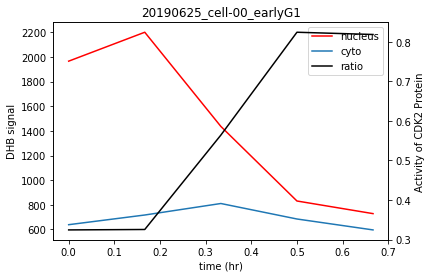

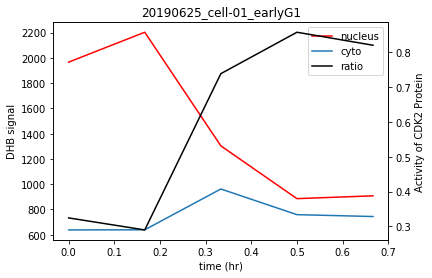

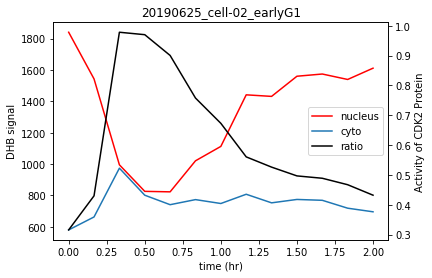

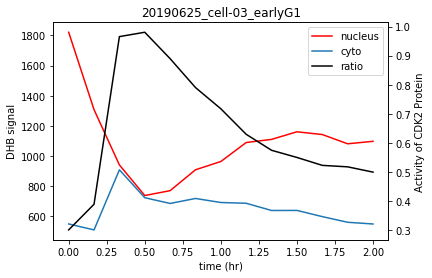

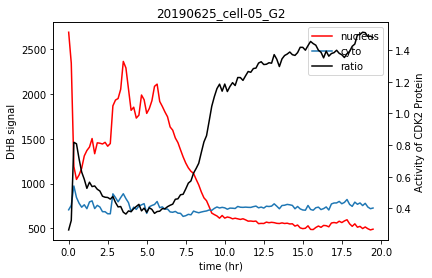

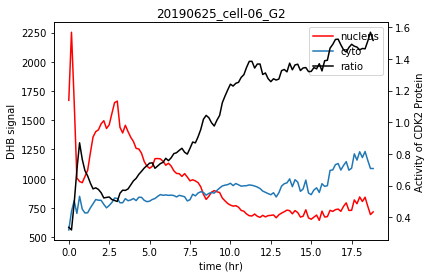

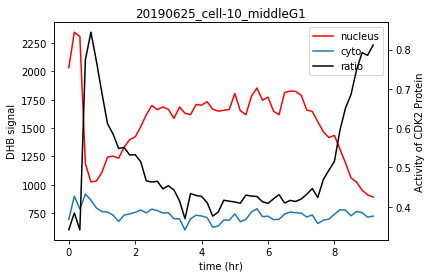

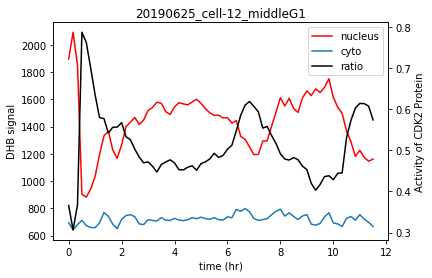

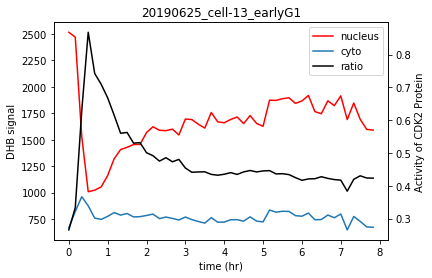

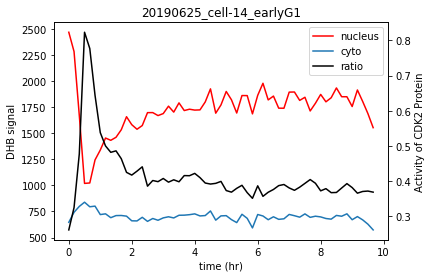

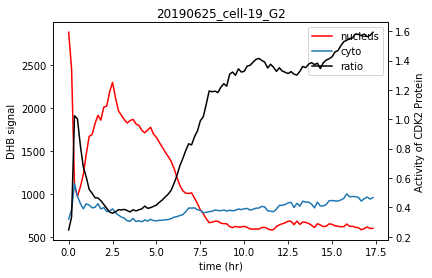

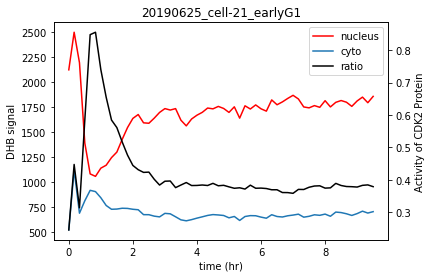

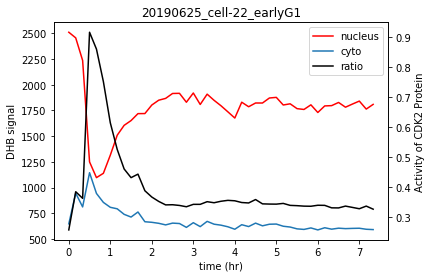

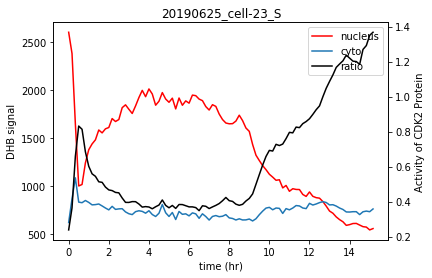

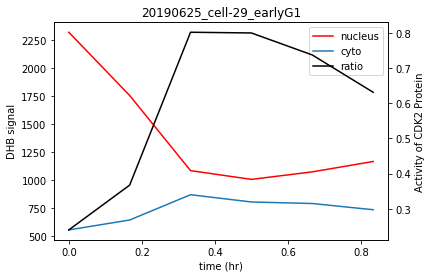

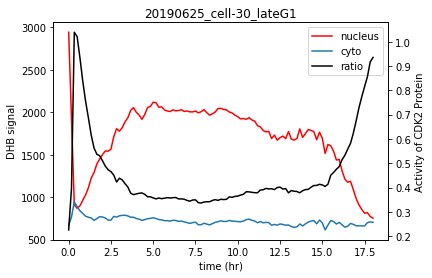

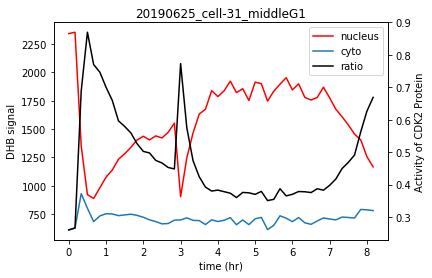

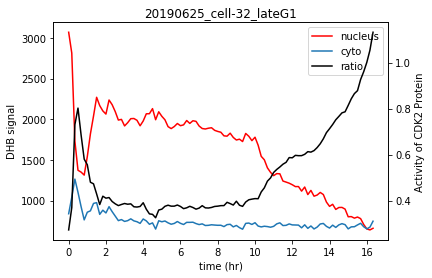

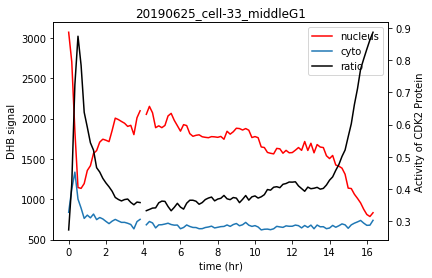

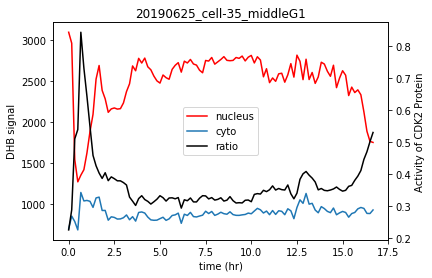

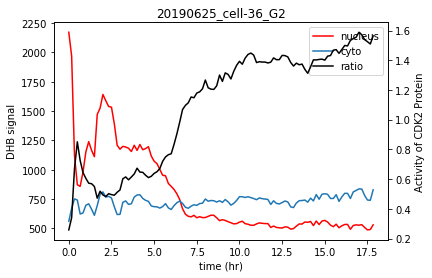

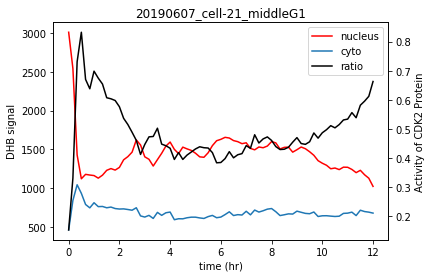

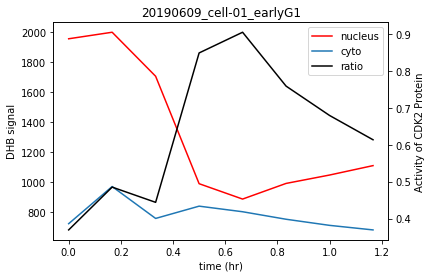

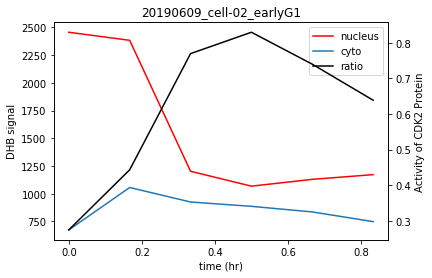

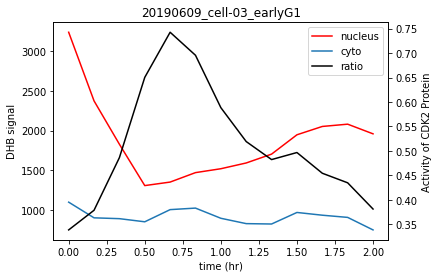

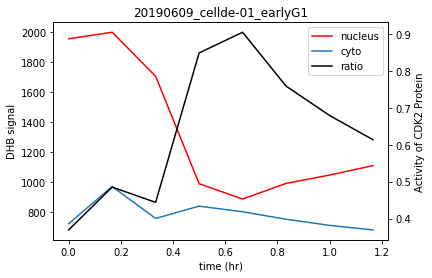

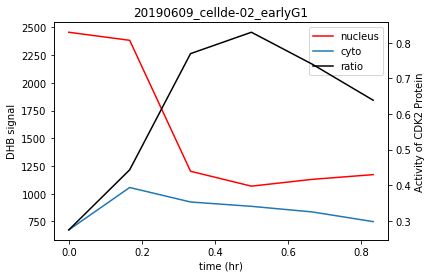

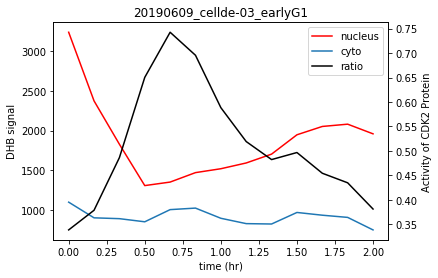

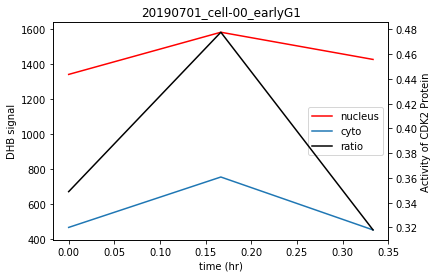

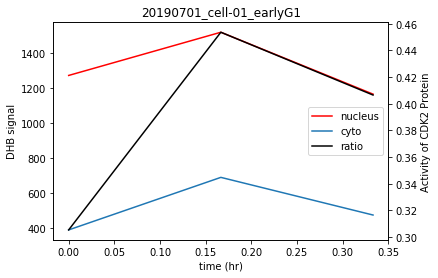

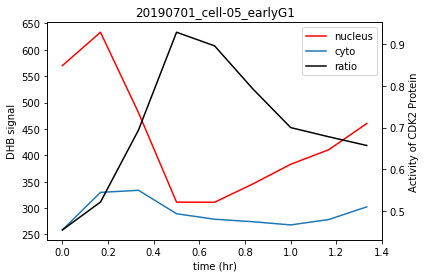

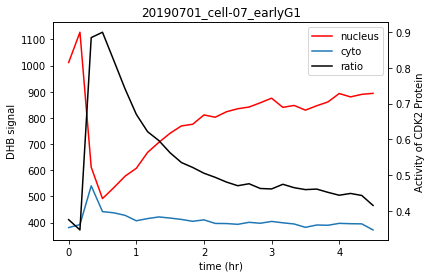

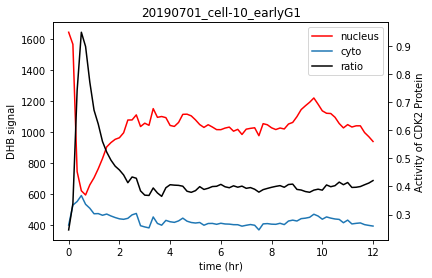

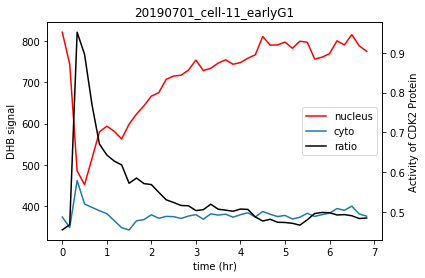

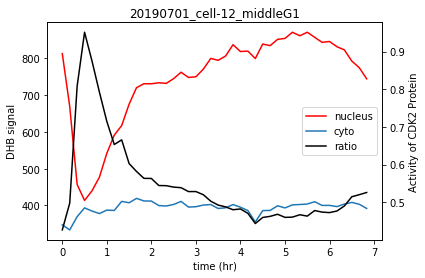

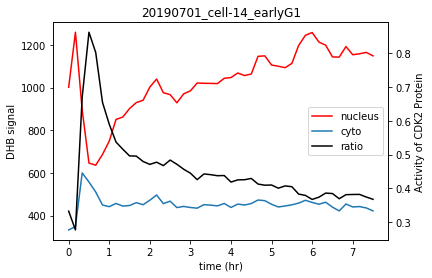

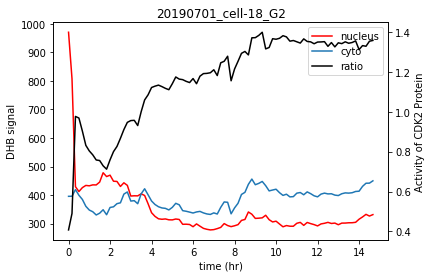

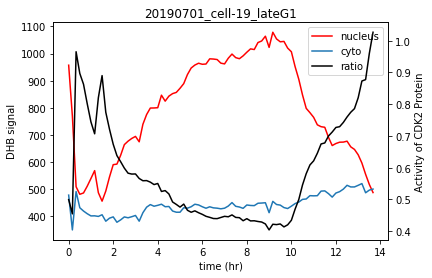

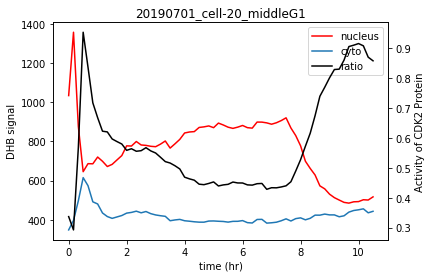

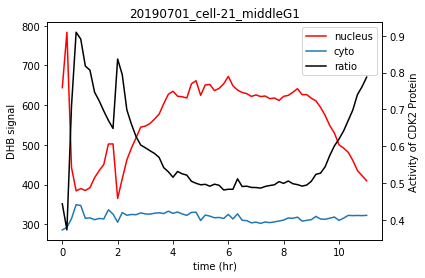

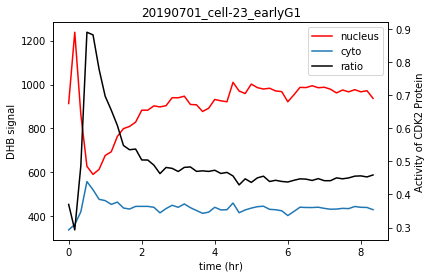

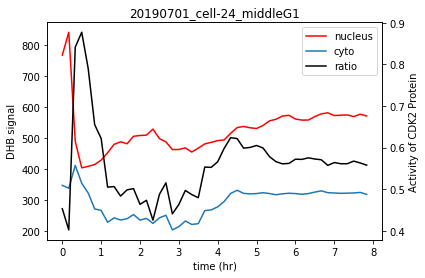

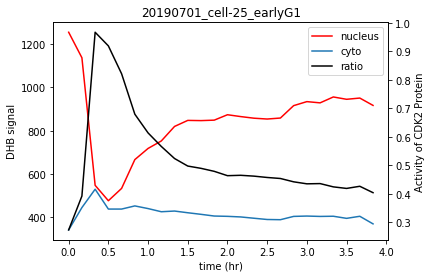

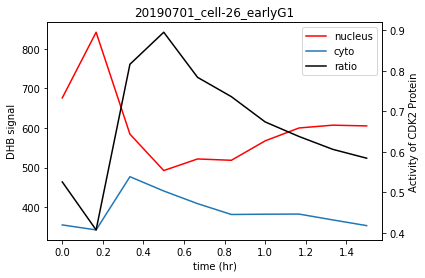

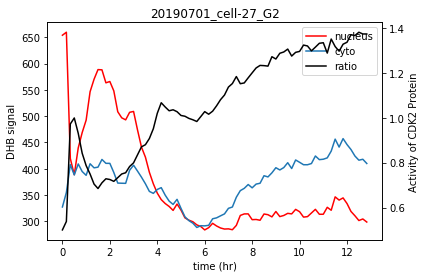

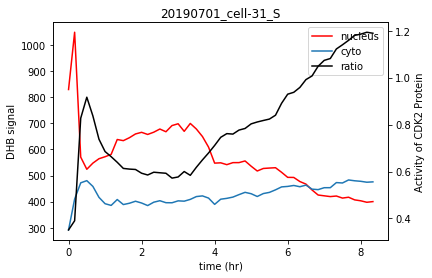

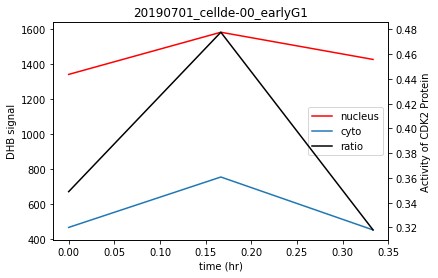

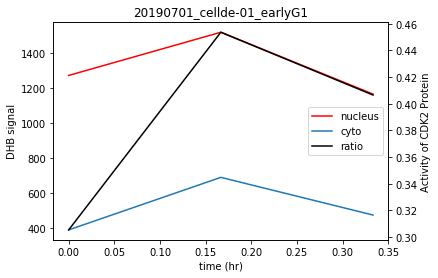

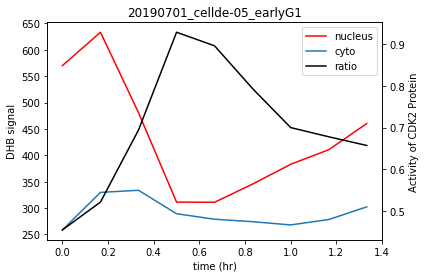

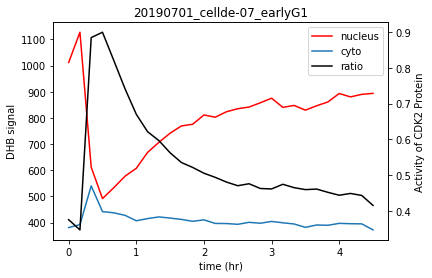

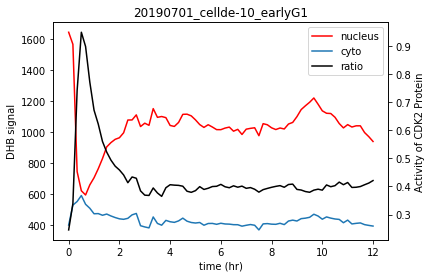

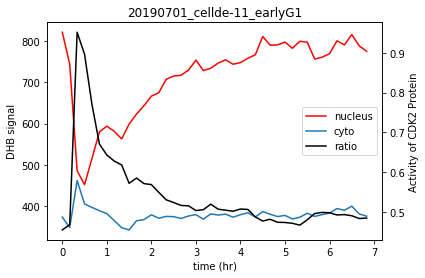

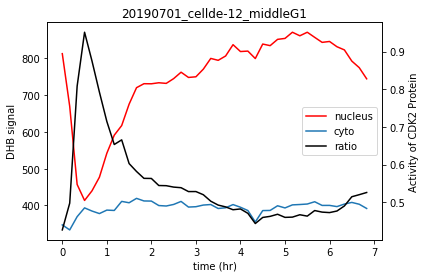

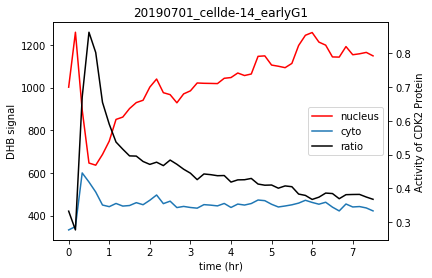

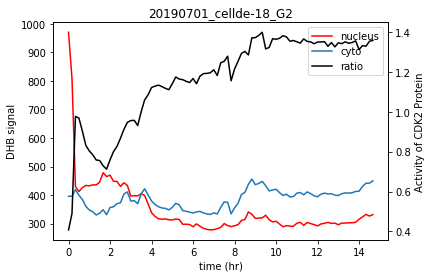

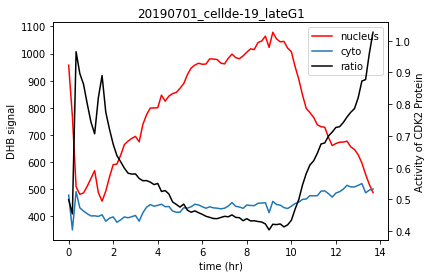

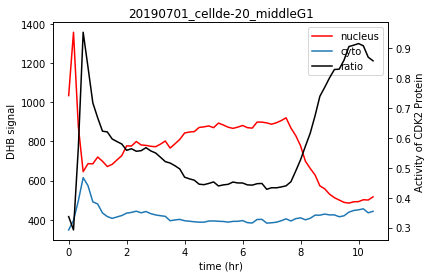

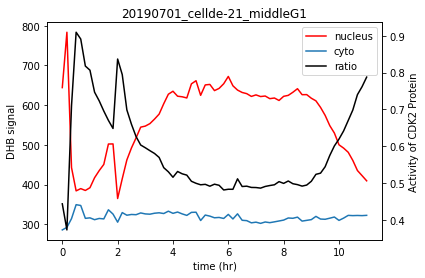

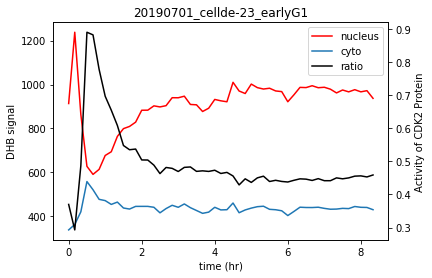

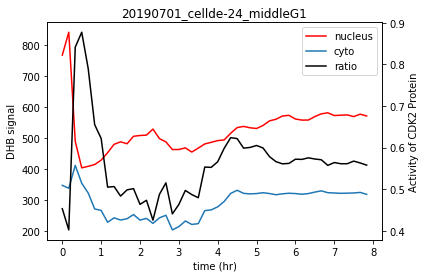

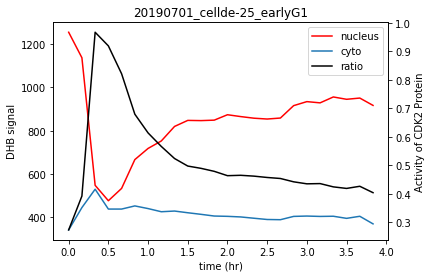

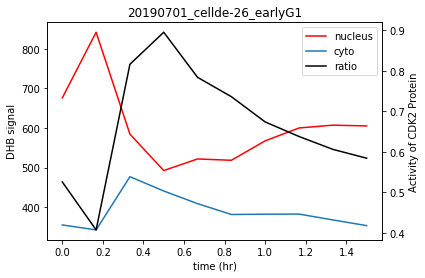

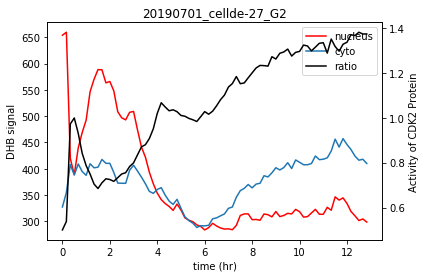

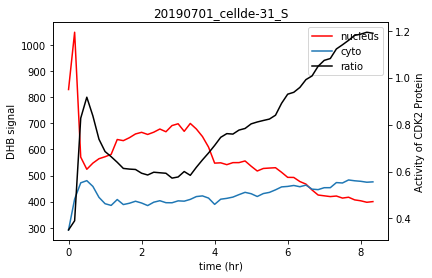

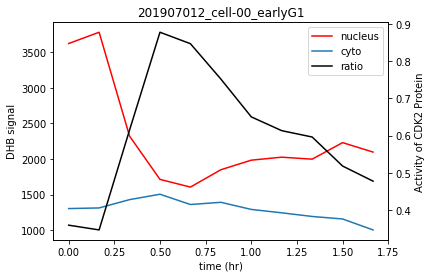

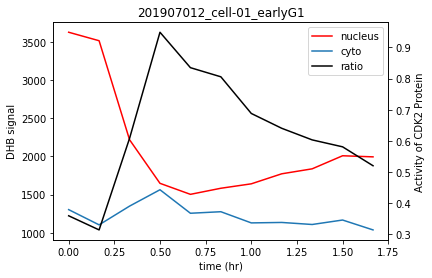

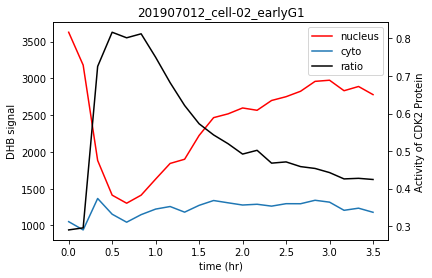

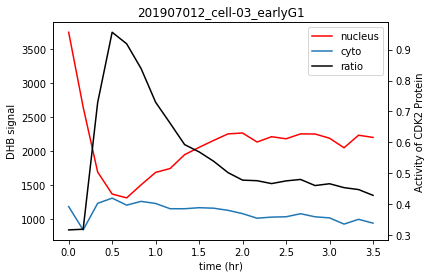

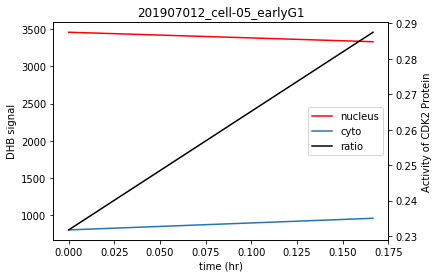

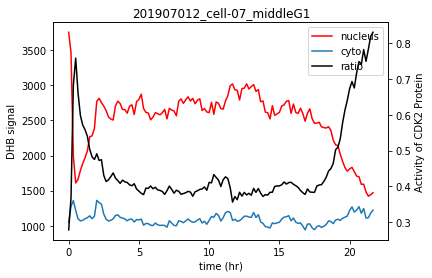

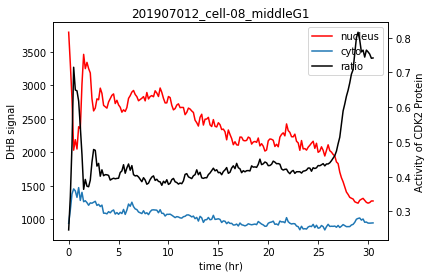

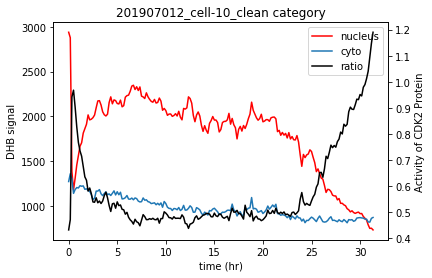

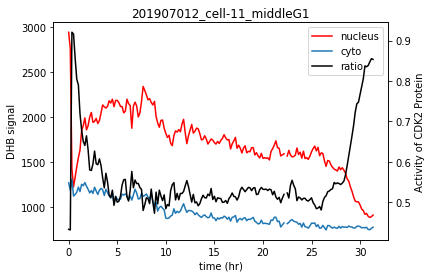

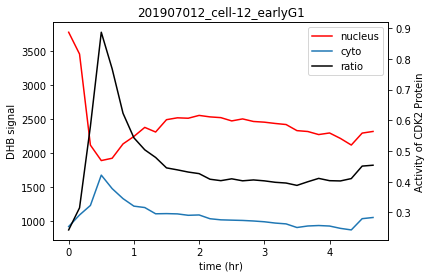

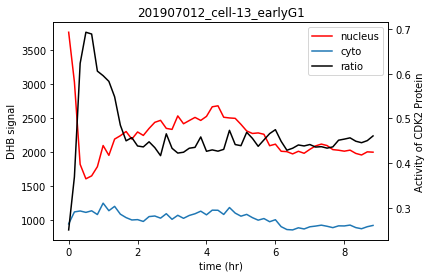

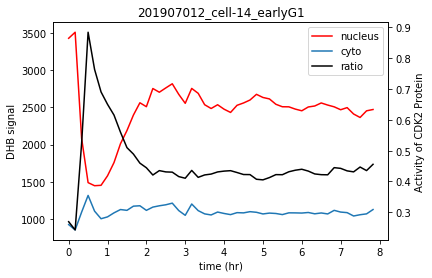

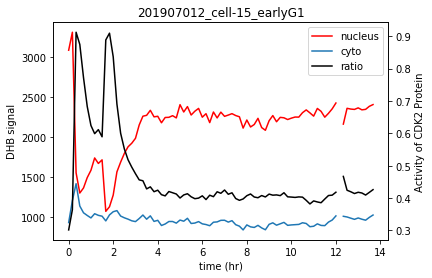

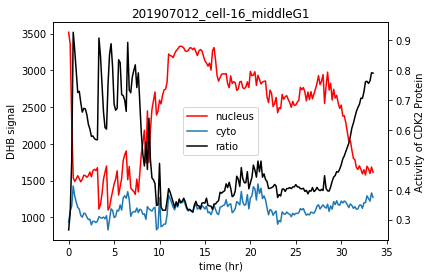

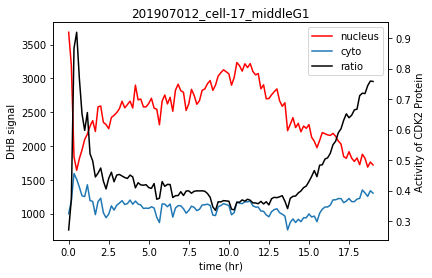

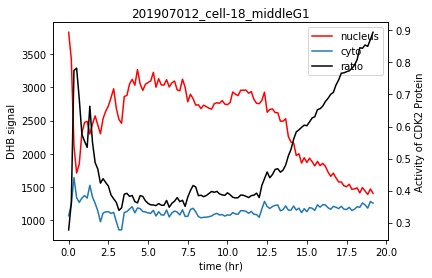

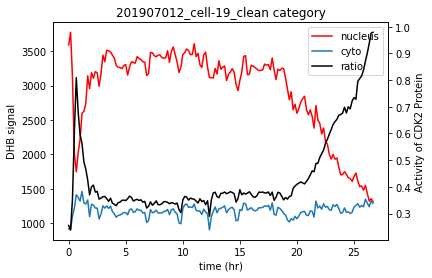

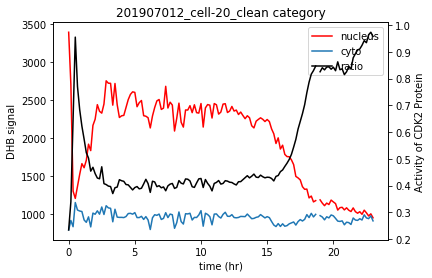

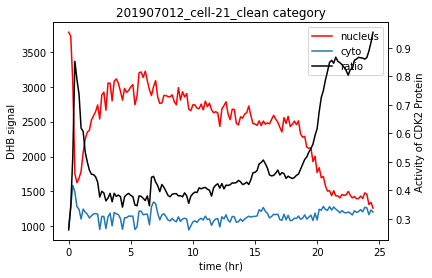

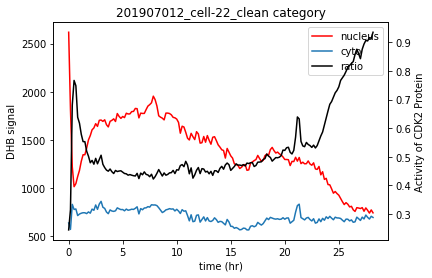

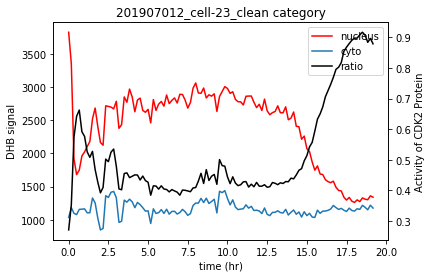

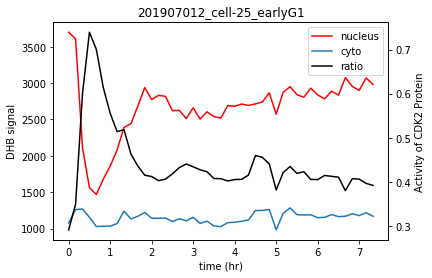

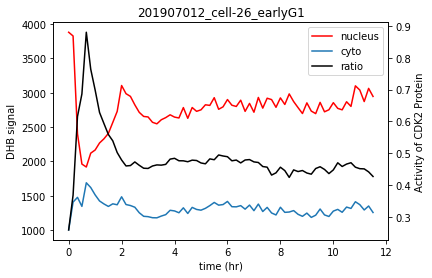

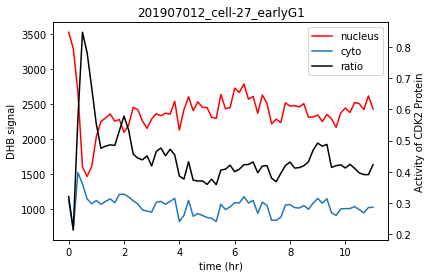

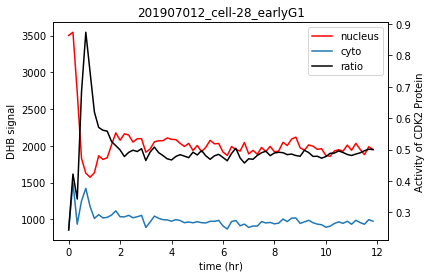

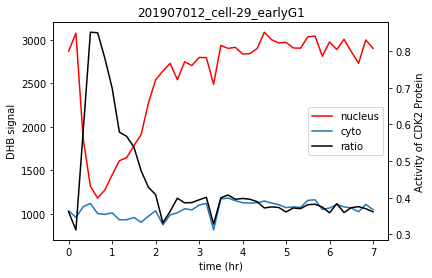

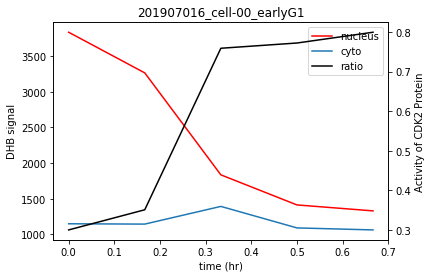

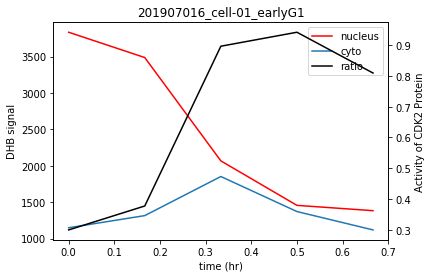

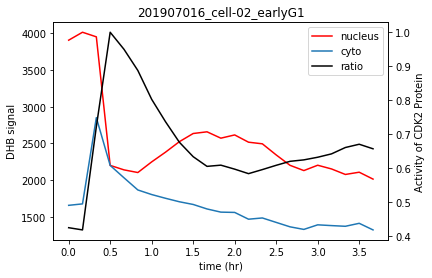

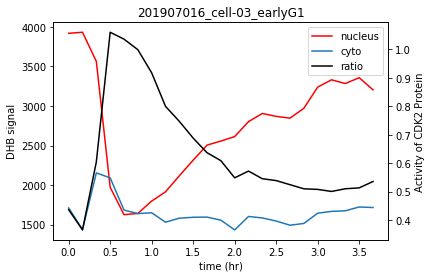

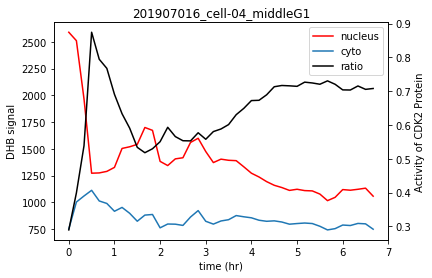

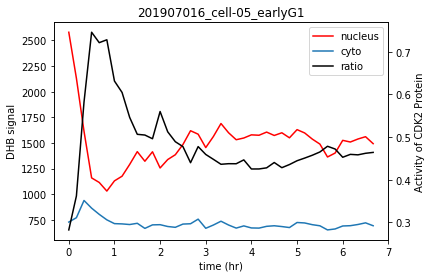

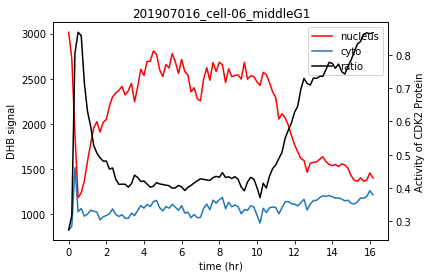

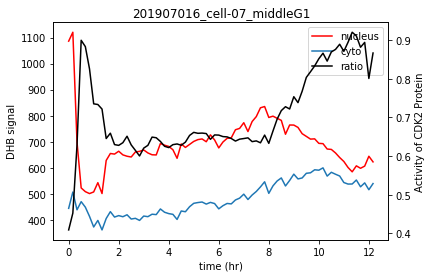

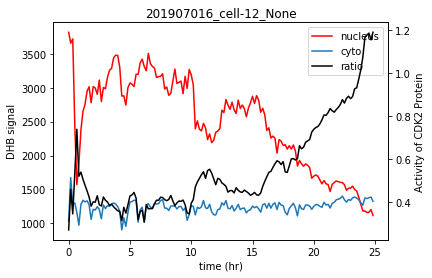

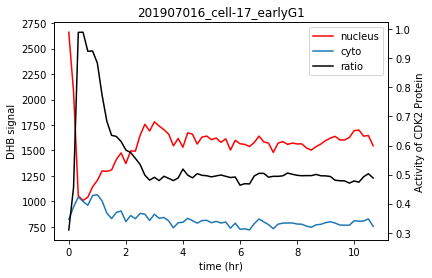

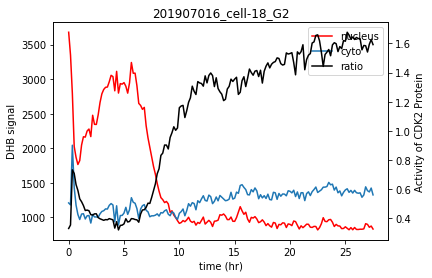

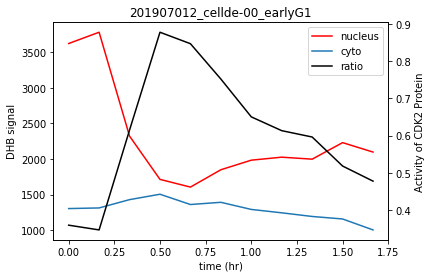

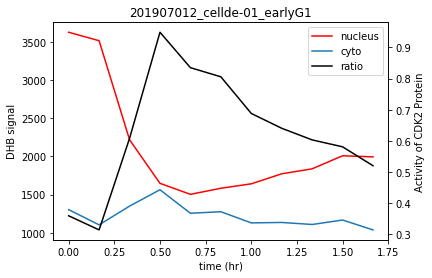

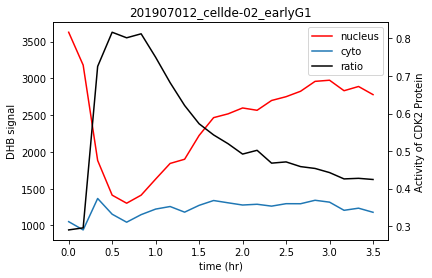

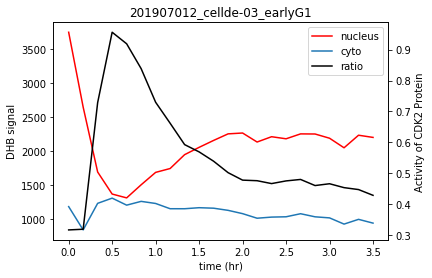

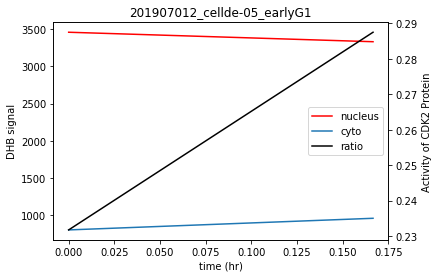

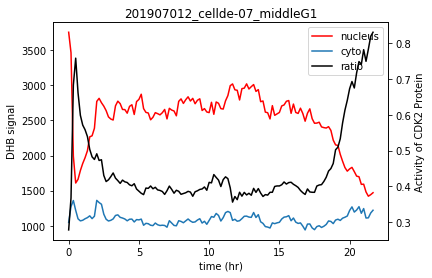

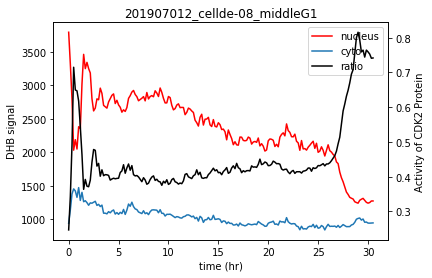

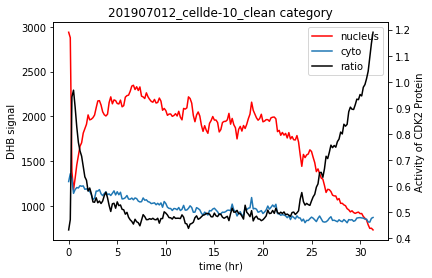

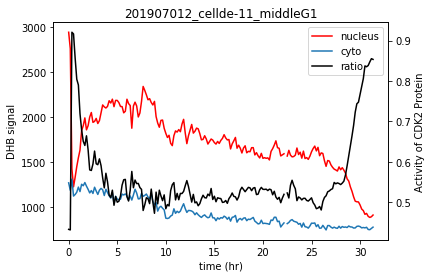

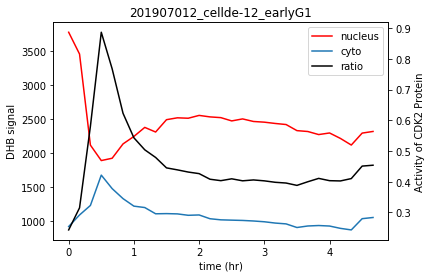

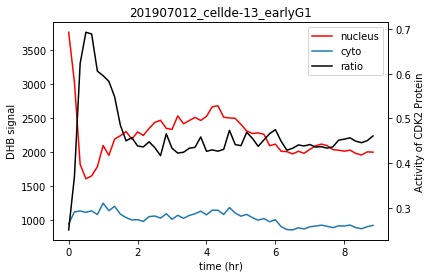

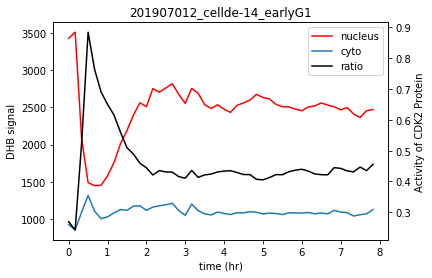

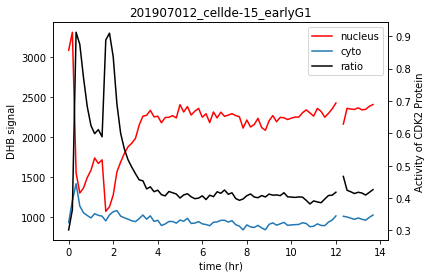

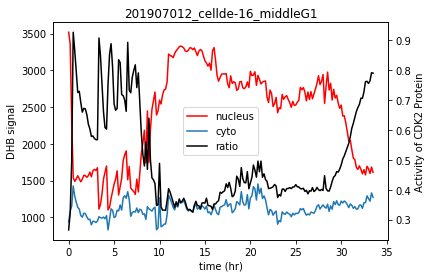

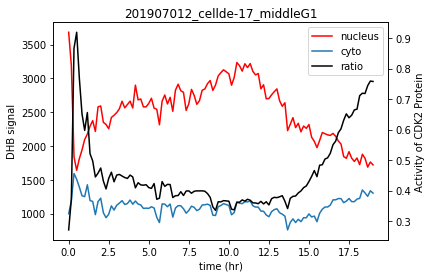

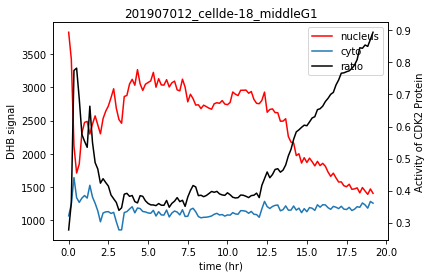

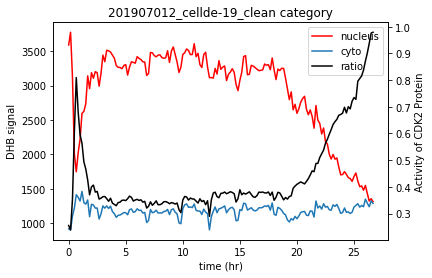

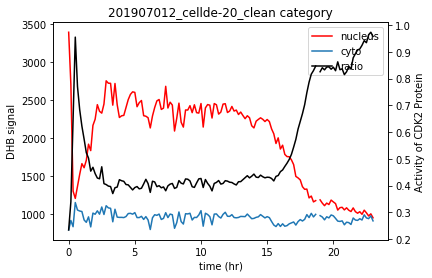

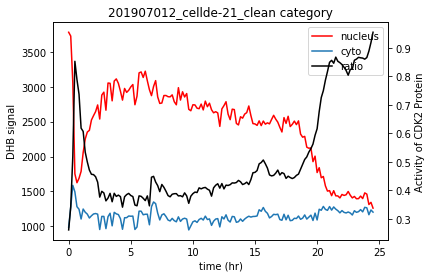

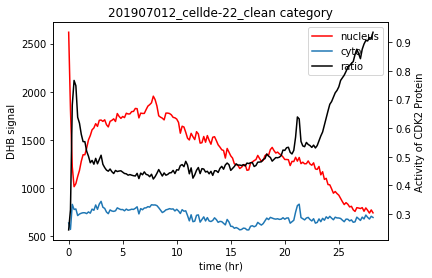

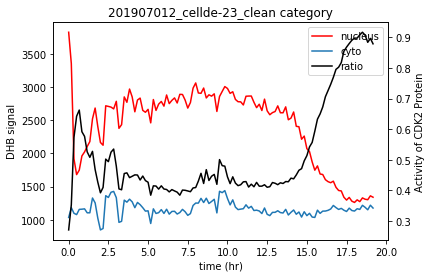

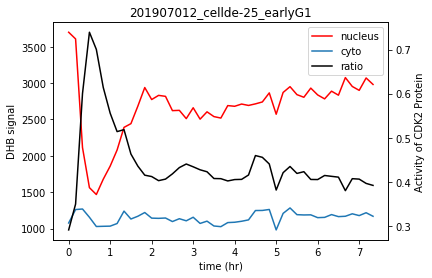

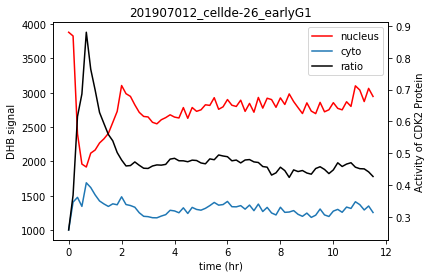

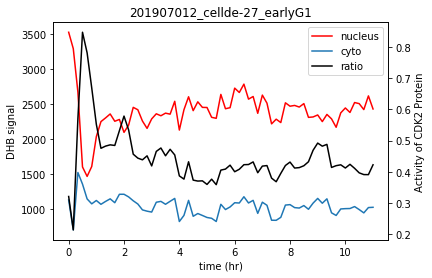

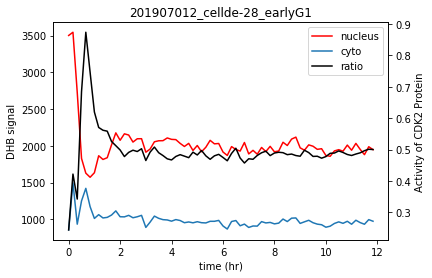

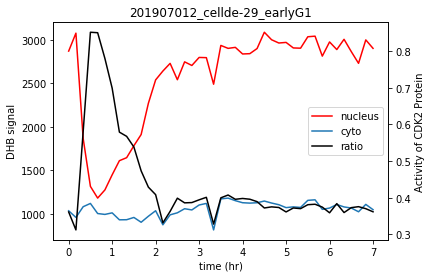

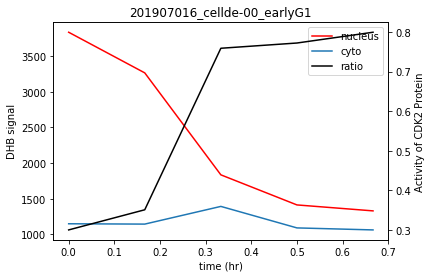

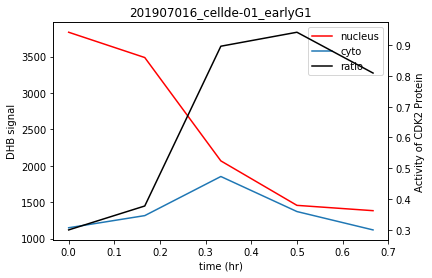

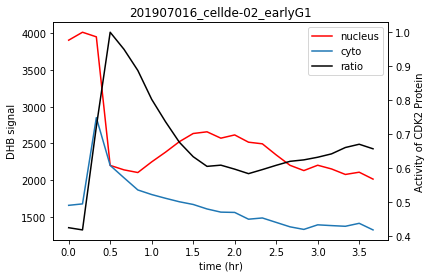

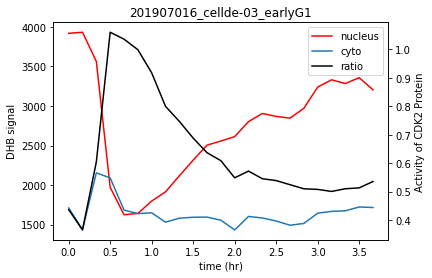

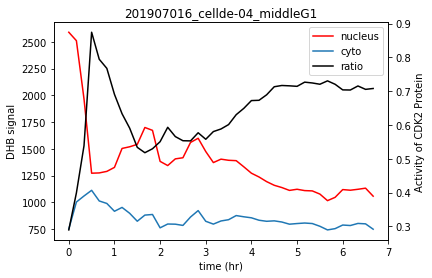

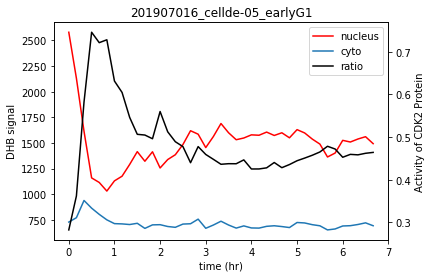

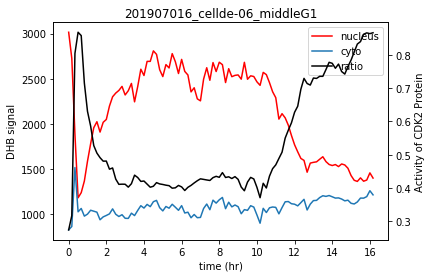

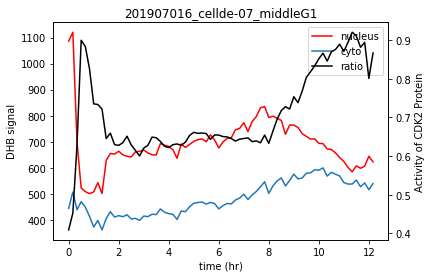

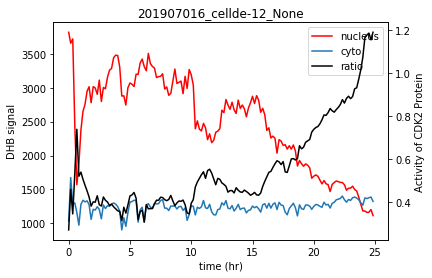

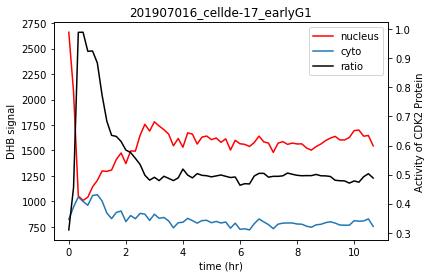

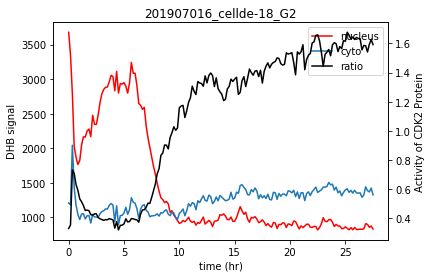

In [111]:
myData['category_cleaned']  = 'clean category'
for i, row in myData.iterrows():
    string = str(row.category)
    if '1' in string:
        if 'rly' in string:
            myData.at[i, 'category_cleaned'] = 'earlyG1'
        elif 'mid' in string:
            myData.at[i, 'category_cleaned'] = 'middleG1'
        elif 'late' in string:
            myData.at[i, 'category_cleaned'] = 'lateG1'
    elif '2' in string:
        myData.at[i, 'category_cleaned'] = 'G2'
    elif "S" == string or 'ph' in string:
        myData.at[i, 'category_cleaned'] = 'S'
    else: 
        myData.at[i, 'category_cleaned'] = None
    

    if row.DHB_nucleus is not None and myData.at[i, 'physicalAgeMatch'] and myData.at[i, 'molecularAgeMatch']:
        if len(row.DHB_nucleus) != 0:
            final_dest = r'Y:\CookLab\Liu\20190816_organizedData_MCM_loading\DHB_trackingPlots'

            x_axis = []
            for x in range (len(myData['DHB_nucleus'].iloc[i])):
                x_axis.append(x *(1/6))
                 
            
            x = [one for one in range(len(myData['DHB_nucleus'].iloc[i]))]


            y1 = myData['DHB_nucleus'].iloc[i]
            y2 = myData['DHB_cyto'].iloc[i]
            y3 = myData['DHB_ratio'].iloc[i]

            fig, ax = plt.subplots()
            ax1 = ax.twinx()

            line1 = ax.plot(x_axis, y1, color = 'red', label = 'nucleus')
            line2 = ax.plot(x_axis, y2, label = 'cyto')
            line3 = ax1.plot(x_axis, y3, color = 'black',label = 'ratio')

            ax.set_xlabel('time (hr)')
            ax.set_ylabel('DHB signal')
            ax1.set_ylabel('Activity of CDK2 Protein')

            lns = line1 + line2 + line3
            labs = [l.get_label() for l in lns]
            ax.legend(lns, labs, loc=0)

            fileName = str(myData['file'][i]).split(".")[0]
            
            plottitle = fileName + '_' + str(myData['category_cleaned'][i])
            plt.title(plottitle)
            plt.show()
            #plt.savefig(f'{final_dest}\\{plottitle}.png')

## function returnHighest
in: str string
out: int maximum length of the DHB data

In [93]:
def returnHighest (string):
    x =[]
    for i, row in myData.loc[myData['category_cleaned'] == string].iterrows():
        if row['DHB_ratio'] is not None:
            x.append(len(row['DHB_ratio']))
    
    return (max(x))


## Plotting DHB ratio for each stages

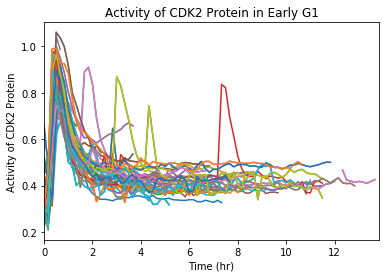

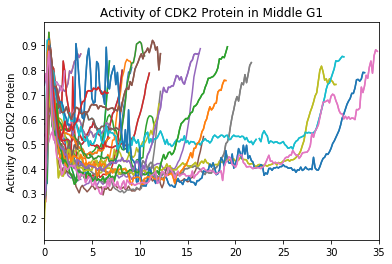

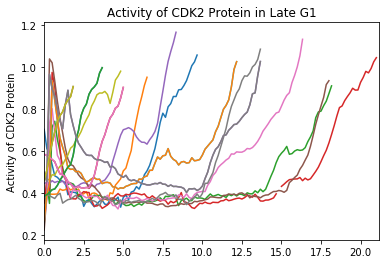

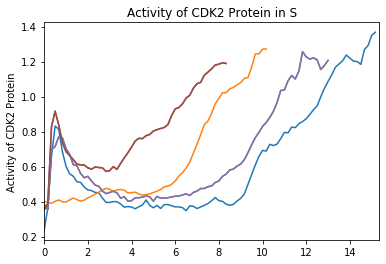

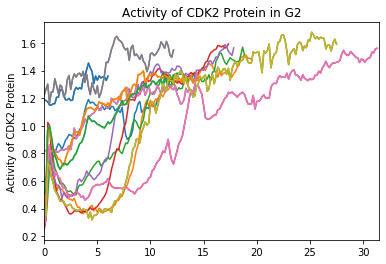

In [112]:
final_dest = r'Y:\CookLab\Liu\20190816_organizedData_MCM_loading\DHB_trackingPlots'


fig, ax = plt.subplots()
plt.xlim(0, returnHighest('earlyG1') /6)
plt.title("Activity of CDK2 Protein in Early G1")
plt.ylabel("Activity of CDK2 Protein")
plt.xlabel("Time (hr)")


fig1, ax1 = plt.subplots()
plt.xlim(0, returnHighest('middleG1')/6)
plt.title("Activity of CDK2 Protein in Middle G1")
plt.ylabel("Activity of CDK2 Protein")

fig2, ax2 = plt.subplots()
plt.xlim(0, returnHighest('lateG1')/6)
plt.title("Activity of CDK2 Protein in Late G1")
plt.ylabel("Activity of CDK2 Protein")

fig3, ax3 = plt.subplots()
plt.xlim(0, returnHighest('S')/6)
plt.title("Activity of CDK2 Protein in S")
plt.ylabel("Activity of CDK2 Protein")

fig4, ax4 = plt.subplots()
plt.xlim(0, returnHighest('G2')/6)
plt.title("Activity of CDK2 Protein in G2")
plt.ylabel("Activity of CDK2 Protein")



for i, row in myData.iterrows():
    if row.DHB_ratio is not None:
        if row.DHB_ratio != []:
            if row.category_cleaned is not None:
                #legendName = row.file + "_" + row['cell id for tracking']
                xaxis = []
                for x in range(len(row.DHB_ratio)):
                    xaxis.append(x * (1/6))
                if  'earlyG1' in row.category_cleaned :
                    currLine = row.DHB_ratio
                    newLine = ax.plot(xaxis, currLine)
                    
                elif 'middleG1' in row.category_cleaned:
                    currLine = row.DHB_ratio
                    newLine = ax1.plot(xaxis, currLine)
                elif 'lateG1' in row.category_cleaned:
                    currLine = row.DHB_ratio
                    newLine = ax2.plot(xaxis, currLine)
                    
                elif 'S' in row.category_cleaned:
                    currLine = row.DHB_ratio
                    newLine = ax3.plot(xaxis, currLine)
                    
                elif 'G2' in row.category_cleaned:
                    currLine = row.DHB_ratio
                    newLine = ax4.plot(xaxis, currLine)
                  
            
plt.show()

#fig.savefig(f'{final_dest}\\ratio_earlyG1.png')
#fig1.savefig(f'{final_dest}\\ratio_middleG1.png')
#fig2.savefig(f'{final_dest}\\ratio_lateG1.png')
#fig3.savefig(f'{final_dest}\\ratio_S.png')
#fig4.savefig(f'{final_dest}\\ratio_G2.png')

## if the legend for each plot is needed
this is the code to use 

currLine = row.DHB_ratio
newLine, = ax1.plot(xaxis, currLine, label = legendName)
ax1.legend()
